In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models

from tensorflow import keras

/home/system-gru/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## I. Introduction:



In [2]:
df = pd.read_csv("linear_train.csv")
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [3]:
#Making x and y
X_data = df.iloc[:,0:1]
y_data = df.iloc[:,1]

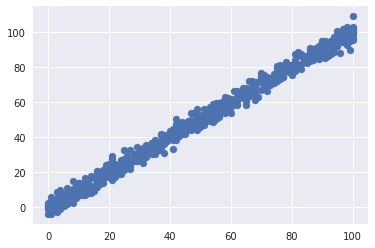

In [4]:
plt.scatter(X_data, y_data)

/home/system-gru/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


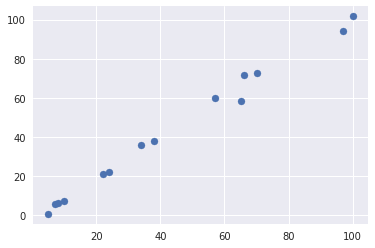

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_data,y_data,train_size=0.02,random_state=1)
plt.scatter(X_train, y_train)

In [6]:
y_train = np.array(y_train)
y_train = y_train.reshape((-1,1))
y_train.shape

(14, 1)

In [7]:
X_train = np.array(X_train)
X_train.shape

(14, 1)

In [8]:
# input layer
np.random.seed(7)
x = layers.Input(shape=(1,), name='inputs')

# output layer for mean and log variance
w = layers.Dense(1, name='mu', kernel_initializer='normal')
z_mu = w(x)

w_log_var = layers.Dense(1, name='log_var', kernel_initializer='normal')
z_log_var = w_log_var(x)

y = z_mu
y_log_var = [z_mu, z_log_var]

model = models.Model(x, y)
model_uncertainty = models.Model(x, y_log_var)

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 1)                 0         
_________________________________________________________________
mu (Dense)                   (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [10]:
model_uncertainty.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             (None, 1)            0                                            
__________________________________________________________________________________________________
mu (Dense)                      (None, 1)            2           inputs[0][0]                     
__________________________________________________________________________________________________
log_var (Dense)                 (None, 1)            2           inputs[0][0]                     
Total params: 4
Trainable params: 4
Non-trainable params: 0
__________________________________________________________________________________________________


In [11]:
# np.random.seed(7)
# model = models.Sequential()
# model.add(layers.Dense(13, input_dim=1, kernel_initializer='normal', activation='relu'))
# model.add(layers.Dense(1, kernel_initializer='normal'))

In [12]:
### Loss for model
def mse_uncertainty(y_true, y_pred):
    mse_loss = tf.losses.mean_squared_error(y_true, y_pred)
    kl_loss = - 0.5 * tf.reduce_sum(1 + z_log_var - tf.square(y_pred) - tf.exp(z_log_var), axis=-1)
    
    return mse_loss + kl_loss

In [24]:
model.compile(loss=mse_uncertainty, optimizer='sgd')

In [25]:
histories = model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
14/14 [==============================] - 0s 12ms/step - loss: 970.0954
Epoch 2/1000
14/14 [==============================] - 0s 264us/step - loss: 971.0250
Epoch 3/1000
14/14 [==============================] - 0s 136us/step - loss: 7824.2388
Epoch 4/1000
14/14 [==============================] - 0s 99us/step - loss: 49304888.0000
Epoch 5/1000
14/14 [==============================] - 0s 105us/step - loss: 354655469568.0000
Epoch 6/1000
14/14 [==============================] - 0s 117us/step - loss: 2551125748219904.0000
Epoch 7/1000
14/14 [==============================] - 0s 110us/step - loss: 18350891948534923264.0000
Epoch 8/1000
14/14 [==============================] - 0s 118us/step - loss: 132002576734057828188160.0000
Epoch 9/1000
14/14 [==============================] - 0s 102us/step - loss: 949527556876172870205571072.0000
Epoch 10/1000
14/14 [==============================] - 0s 142us/step - loss: 6830192117973280947827889930240.0000
Epoch 11/1000
14/14 [============

Epoch 100/1000
14/14 [==============================] - 0s 178us/step - loss: nan
Epoch 101/1000
14/14 [==============================] - 0s 194us/step - loss: nan
Epoch 102/1000
14/14 [==============================] - 0s 178us/step - loss: nan
Epoch 103/1000
14/14 [==============================] - 0s 171us/step - loss: nan
Epoch 104/1000
14/14 [==============================] - 0s 175us/step - loss: nan
Epoch 105/1000
14/14 [==============================] - 0s 208us/step - loss: nan
Epoch 106/1000
14/14 [==============================] - 0s 153us/step - loss: nan
Epoch 107/1000
14/14 [==============================] - 0s 170us/step - loss: nan
Epoch 108/1000
14/14 [==============================] - 0s 180us/step - loss: nan
Epoch 109/1000
14/14 [==============================] - 0s 158us/step - loss: nan
Epoch 110/1000
14/14 [==============================] - 0s 236us/step - loss: nan
Epoch 111/1000
14/14 [==============================] - 0s 171us/step - loss: nan
Epoch 112/1000
1

Epoch 200/1000
14/14 [==============================] - 0s 184us/step - loss: nan
Epoch 201/1000
14/14 [==============================] - 0s 144us/step - loss: nan
Epoch 202/1000
14/14 [==============================] - 0s 153us/step - loss: nan
Epoch 203/1000
14/14 [==============================] - 0s 155us/step - loss: nan
Epoch 204/1000
14/14 [==============================] - 0s 153us/step - loss: nan
Epoch 205/1000
14/14 [==============================] - 0s 169us/step - loss: nan
Epoch 206/1000
14/14 [==============================] - 0s 431us/step - loss: nan
Epoch 207/1000
14/14 [==============================] - 0s 136us/step - loss: nan
Epoch 208/1000
14/14 [==============================] - 0s 108us/step - loss: nan
Epoch 209/1000
14/14 [==============================] - 0s 131us/step - loss: nan
Epoch 210/1000
14/14 [==============================] - 0s 115us/step - loss: nan
Epoch 211/1000
14/14 [==============================] - 0s 107us/step - loss: nan
Epoch 212/1000
1

Epoch 300/1000
14/14 [==============================] - 0s 307us/step - loss: nan
Epoch 301/1000
14/14 [==============================] - 0s 319us/step - loss: nan
Epoch 302/1000
14/14 [==============================] - 0s 116us/step - loss: nan
Epoch 303/1000
14/14 [==============================] - 0s 112us/step - loss: nan
Epoch 304/1000
14/14 [==============================] - 0s 310us/step - loss: nan
Epoch 305/1000
14/14 [==============================] - 0s 176us/step - loss: nan
Epoch 306/1000
14/14 [==============================] - 0s 352us/step - loss: nan
Epoch 307/1000
14/14 [==============================] - 0s 208us/step - loss: nan
Epoch 308/1000
14/14 [==============================] - 0s 174us/step - loss: nan
Epoch 309/1000
14/14 [==============================] - 0s 154us/step - loss: nan
Epoch 310/1000
14/14 [==============================] - 0s 137us/step - loss: nan
Epoch 311/1000
14/14 [==============================] - 0s 452us/step - loss: nan
Epoch 312/1000
1

Epoch 400/1000
14/14 [==============================] - 0s 167us/step - loss: nan
Epoch 401/1000
14/14 [==============================] - 0s 168us/step - loss: nan
Epoch 402/1000
14/14 [==============================] - 0s 177us/step - loss: nan
Epoch 403/1000
14/14 [==============================] - 0s 153us/step - loss: nan
Epoch 404/1000
14/14 [==============================] - 0s 203us/step - loss: nan
Epoch 405/1000
14/14 [==============================] - 0s 135us/step - loss: nan
Epoch 406/1000
14/14 [==============================] - 0s 117us/step - loss: nan
Epoch 407/1000
14/14 [==============================] - 0s 107us/step - loss: nan
Epoch 408/1000
14/14 [==============================] - 0s 151us/step - loss: nan
Epoch 409/1000
14/14 [==============================] - 0s 161us/step - loss: nan
Epoch 410/1000
14/14 [==============================] - 0s 158us/step - loss: nan
Epoch 411/1000
14/14 [==============================] - 0s 111us/step - loss: nan
Epoch 412/1000
1

Epoch 500/1000
14/14 [==============================] - 0s 147us/step - loss: nan
Epoch 501/1000
14/14 [==============================] - 0s 166us/step - loss: nan
Epoch 502/1000
14/14 [==============================] - 0s 199us/step - loss: nan
Epoch 503/1000
14/14 [==============================] - 0s 164us/step - loss: nan
Epoch 504/1000
14/14 [==============================] - 0s 157us/step - loss: nan
Epoch 505/1000
14/14 [==============================] - 0s 135us/step - loss: nan
Epoch 506/1000
14/14 [==============================] - 0s 154us/step - loss: nan
Epoch 507/1000
14/14 [==============================] - 0s 159us/step - loss: nan
Epoch 508/1000
14/14 [==============================] - 0s 148us/step - loss: nan
Epoch 509/1000
14/14 [==============================] - 0s 183us/step - loss: nan
Epoch 510/1000
14/14 [==============================] - 0s 157us/step - loss: nan
Epoch 511/1000
14/14 [==============================] - 0s 155us/step - loss: nan
Epoch 512/1000
1

Epoch 600/1000
14/14 [==============================] - 0s 155us/step - loss: nan
Epoch 601/1000
14/14 [==============================] - 0s 142us/step - loss: nan
Epoch 602/1000
14/14 [==============================] - 0s 313us/step - loss: nan
Epoch 603/1000
14/14 [==============================] - 0s 139us/step - loss: nan
Epoch 604/1000
14/14 [==============================] - 0s 120us/step - loss: nan
Epoch 605/1000
14/14 [==============================] - 0s 115us/step - loss: nan
Epoch 606/1000
14/14 [==============================] - 0s 124us/step - loss: nan
Epoch 607/1000
14/14 [==============================] - 0s 164us/step - loss: nan
Epoch 608/1000
14/14 [==============================] - 0s 147us/step - loss: nan
Epoch 609/1000
14/14 [==============================] - 0s 248us/step - loss: nan
Epoch 610/1000
14/14 [==============================] - 0s 185us/step - loss: nan
Epoch 611/1000
14/14 [==============================] - 0s 195us/step - loss: nan
Epoch 612/1000
1

Epoch 700/1000
14/14 [==============================] - 0s 162us/step - loss: nan
Epoch 701/1000
14/14 [==============================] - 0s 149us/step - loss: nan
Epoch 702/1000
14/14 [==============================] - 0s 147us/step - loss: nan
Epoch 703/1000
14/14 [==============================] - 0s 173us/step - loss: nan
Epoch 704/1000
14/14 [==============================] - 0s 128us/step - loss: nan
Epoch 705/1000
14/14 [==============================] - 0s 139us/step - loss: nan
Epoch 706/1000
14/14 [==============================] - 0s 138us/step - loss: nan
Epoch 707/1000
14/14 [==============================] - 0s 158us/step - loss: nan
Epoch 708/1000
14/14 [==============================] - 0s 149us/step - loss: nan
Epoch 709/1000
14/14 [==============================] - 0s 156us/step - loss: nan
Epoch 710/1000
14/14 [==============================] - 0s 145us/step - loss: nan
Epoch 711/1000
14/14 [==============================] - 0s 188us/step - loss: nan
Epoch 712/1000
1

Epoch 800/1000
14/14 [==============================] - 0s 190us/step - loss: nan
Epoch 801/1000
14/14 [==============================] - 0s 206us/step - loss: nan
Epoch 802/1000
14/14 [==============================] - 0s 165us/step - loss: nan
Epoch 803/1000
14/14 [==============================] - 0s 161us/step - loss: nan
Epoch 804/1000
14/14 [==============================] - 0s 236us/step - loss: nan
Epoch 805/1000
14/14 [==============================] - 0s 390us/step - loss: nan
Epoch 806/1000
14/14 [==============================] - 0s 193us/step - loss: nan
Epoch 807/1000
14/14 [==============================] - 0s 175us/step - loss: nan
Epoch 808/1000
14/14 [==============================] - 0s 307us/step - loss: nan
Epoch 809/1000
14/14 [==============================] - 0s 206us/step - loss: nan
Epoch 810/1000
14/14 [==============================] - 0s 184us/step - loss: nan
Epoch 811/1000
14/14 [==============================] - 0s 158us/step - loss: nan
Epoch 812/1000
1

Epoch 900/1000
14/14 [==============================] - 0s 122us/step - loss: nan
Epoch 901/1000
14/14 [==============================] - 0s 117us/step - loss: nan
Epoch 902/1000
14/14 [==============================] - 0s 102us/step - loss: nan
Epoch 903/1000
14/14 [==============================] - 0s 104us/step - loss: nan
Epoch 904/1000
14/14 [==============================] - 0s 102us/step - loss: nan
Epoch 905/1000
14/14 [==============================] - 0s 98us/step - loss: nan
Epoch 906/1000
14/14 [==============================] - 0s 104us/step - loss: nan
Epoch 907/1000
14/14 [==============================] - 0s 105us/step - loss: nan
Epoch 908/1000
14/14 [==============================] - 0s 102us/step - loss: nan
Epoch 909/1000
14/14 [==============================] - 0s 105us/step - loss: nan
Epoch 910/1000
14/14 [==============================] - 0s 104us/step - loss: nan
Epoch 911/1000
14/14 [==============================] - 0s 119us/step - loss: nan
Epoch 912/1000
14

Epoch 1000/1000
14/14 [==============================] - 0s 169us/step - loss: nan


In [21]:
model_uncertainty.predict([11])

[array([[7.8208084]], dtype=float32), array([[0.0506853]], dtype=float32)]